![planilla](planilla_atenuacion.png)

$\alpha_{max} = 0.3db$

$\alpha_{min} = 22db$

$\omega_{p} = 10$

$\omega_{s} = 24.58$

### sintetizar un circuto con topologia MFB y Funcion de Aproximacion Chebychev

Apliacando analisis de nodos construyo el sistema de ecuaciones con el que calculo la transferencia

$ V_{1} * (G_{1} + G_{2} + s*C_{1} + G_{3} = 0$


$ V_{x} * G_{4} + V_{o} *G_{5} = 0 $



![Topologia](Topologia_MFB_Pasa_Bajas.png)

In [ ]:
### Calculamos la transferencia en funcion de los componentes circuitales (G1,G2,G3,C1,C2) para un orden 2

Tener en cuenta que con el filtro de orden 2 cascadeo y obtengo ordenes mayores

In [1]:
# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import TransferFunction

fig_sz_x = 8
fig_sz_y = 6
fig_dpi = 150 # dpi

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi

plt.figure(1)
plt.plot(np.random.rand(10))
plt.close(1)

# módulo de análisis simbólico
import sympy as sp
# variable de Laplace
from sympy.abc import s
from IPython.display import display, Math, Markdown

# Ahora importamos las funciones de PyTC2
from pytc2.general import simplify_n_monic
from pytc2.sistemas_lineales import  parametrize_sos
from pytc2.general import print_subtitle

In [2]:
# variables simbólicas
s = sp.symbols('s', complex=True)
V1, Vi, Vo = sp.symbols("V1, Vi, Vo")
G1, G2, G3, C1, C2, As, wt = sp.symbols("G1, G2, G3, C1, C2, As, wt")

# Sistemas de ecuaciones del modelo ideal, negativamente realimentado
aa = sp.solve([ 
                V1*(G1+G2+s*C1+G3) - Vi*G1 - Vo*G2,    #define las ecuaciones
                V1 * G3 +Vo * s* C2,
                ], 
                [Vo, Vi, V1])                          #define las incognitas

T1 = aa[Vo]/aa[Vi]   #Calcula la transferencia T1 dividiendo la solución de Vo (salida) entre la solución de Vi (entrada).

num, den = sp.fraction(sp.simplify(sp.expand(T1)))   #Utiliza las funciones fraction, simplify y expand de sympy para obtener el numerador y el denominador de T1 de manera simplificada.

num = sp.Poly(num,s) #Crea un objeto Poly de sympy para el numerador utilizando la función Poly. 
                     #Esto permite realizar operaciones algebraicas con el numerador.
den = sp.Poly(den,s)

num1, den1, w_on, Q_n, w_od, Q_d, k1 = parametrize_sos(num, den)

print_subtitle('Transferencia obtenida')

display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(sp.Mul(k1,num1/den1, evaluate=False)) ))

print_subtitle('Parámetros')

display(Math( r' k = ' + sp.latex(k1) ))

display(Math( r' \omega_0 = ' + sp.latex(w_od) ))

display(Math( r' Q = ' + sp.latex(Q_d) ))

#### Transferencia obtenida

<IPython.core.display.Math object>

#### Parámetros

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
### Calculamos el orden del filtro a diseñar segun los requerimientos
El procedimiento a utilizar es el de iteraciones

In [3]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS

from pytc2.general import Chebyshev_polynomials, s, w, print_subtitle #aca ya crea instancias s y w de sympy
import sympy as sp
from IPython.display import display, Math, Markdown

#LA PLANTILLA NORMALIZADA
alfa_max = 0.3 # dB 
alfa_min = 22 # dB
ws = 2.468

# epsilon cuadrado
eps_sq = 10**(alfa_max/10)-1
eps = np.sqrt(eps_sq)

print("eps = " , eps)

for nn in range(2,5):
    
    alfa_min_c = 10*np.log10(1 + eps_sq * np.cosh(nn * np.arccosh(ws))**2 )
    # print( 'nn {:d} - alfa_min_cheby {:f}'.format(nn, alfa_min_c) )

    alfa_min_b = 10*np.log10(1 + eps_sq * ws**(2*nn))
    print( 'nn {:d} - alfa_min_butter {:f} - alfa_min_cheby {:f}'.format(nn, alfa_min_b, alfa_min_c) )




eps =  0.2674309354536352
nn 2 - alfa_min_butter 5.626981 - alfa_min_cheby 9.975019
nn 3 - alfa_min_butter 12.345671 - alfa_min_cheby 23.006614
nn 4 - alfa_min_butter 19.975739 - alfa_min_cheby 36.471863


Aca debemos elegir el valor de n cuya iteracion cumple con la atenuacion minima  $\alpha_{min}\geq 22db$

In [4]:
nn = 3

### Establecido el orden del filtro a sintetizar procedemos al analisis simbolico

In [5]:
#calculo los coeficente Cn de cheby
chebn_expr = Chebyshev_polynomials(nn)
display(sp.expand(chebn_expr)) #visualizacion en latex

#Conformo la funcion de transferencia al cuadrado en jw
Tcsq_jw = 1 / (1 + eps_sq * chebn_expr**2) #transferencia cheby square (al cuadrado)
display(Math( r' \left \| T_{c}{(\omega )} \right \|^{2} = ' + sp.latex(sp.expand(Tcsq_jw)) ))

#remplazo w=s/j
j = sp.I   # asignacion de j como la unidad imaginaria de sympy
Tcsq_s = Tcsq_jw.subs(w, s/j) 
display(Math( r' \left \| T_{c}{(s)} \right \|^{2} = ' + sp.latex(sp.expand(Tcsq_s)) ))

4*w**3 - 3*w

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Aca tengo un polinomi de orden 6 ya esta representando $\left \| T_{c}{(s)} \right \|^{2}$, por lo tanto tengo todos los polos que la simetria cuadrantal me determina. En la practica solo uso los que se encuentran en el semi plano izq.

Recordar $\left \| T_{c}{(s)} \right \|^{2} = T_{(s)}.T_{(-s)} $

### Analisis numerico

In [6]:
# Construir array de coeficientes denominador del polinomio de  chebychev (Tcsq_den_s )
Cn3 = np.array([4., 0., -3., 0])  #construido a partir de los cn 4w³-3w
Cn3sq = np.polymul( Cn3, Cn3)
Tcsq_den_jw = np.polyadd( np.array([1.]), Cn3sq * eps_sq ) 

# convierto a s
Tcsq_den_s = Tcsq_den_jw * np.array([-1,-1,1,1,-1,-1,1]) # pasar a s es aplicar la ley de signos 
print("COEFICIENTES DENOMINADOR POLINOMIO EN s ")
print(Tcsq_den_s) #polinomio cuyos coificientes son los de sp.expand(Tcsq_s) del analisis simbolico

print ("\n" *2)

roots_Tcsq_den_s = np.roots(Tcsq_den_s) #hallando las raices de este array de coeficientes obtengo los polos
print("polos: " ,roots_Tcsq_den_s)

print("\n" * 2)

# filtro T(s) reteniendo solo polos en el semi plano izquierdo
roots_Tcsq_den_s = roots_Tcsq_den_s[np.real(roots_Tcsq_den_s) < 0]
print("Polos SPI: ",roots_Tcsq_den_s)

COEFICIENTES DENOMINADOR POLINOMIO EN s 
[-1.14430888 -0.         -1.71646333  0.         -0.64367375 -0.
  1.        ]



polos:  [ 0.36463866+1.07186009j  0.36463866-1.07186009j -0.36463866+1.07186009j
 -0.36463866-1.07186009j -0.72927732+0.j          0.72927732+0.j        ]



Polos SPI:  [-0.36463866+1.07186009j -0.36463866-1.07186009j -0.72927732+0.j        ]


### Comprobacion con funcion de scipy sig.cheb1ap()

In [7]:
z,p,k = sig.cheb1ap(nn, alfa_max)
num_cheb, den_cheb = sig.zpk2tf(z,p,k)

print("CEROS de la funcion de trans con aprox chebychev")
print("z=",z)
print("\n")

print("POLOS de la funcion de trans con aprox chebychev")
print("p=",p)
print("\n")

print("ganacia K")
print("k=",k)


CEROS
z= []


POLOS
p= [-0.36463866+1.07186009j -0.72927732-0.j         -0.36463866-1.07186009j]


ganacia K
k= 0.9348207961653062


### Expresamos el polinomio de orden 3 como la multiplicacion de uno de orden 2 x orden 1

#### Cheby_ord_3_rip_0.3_att_22

<IPython.core.display.Math object>

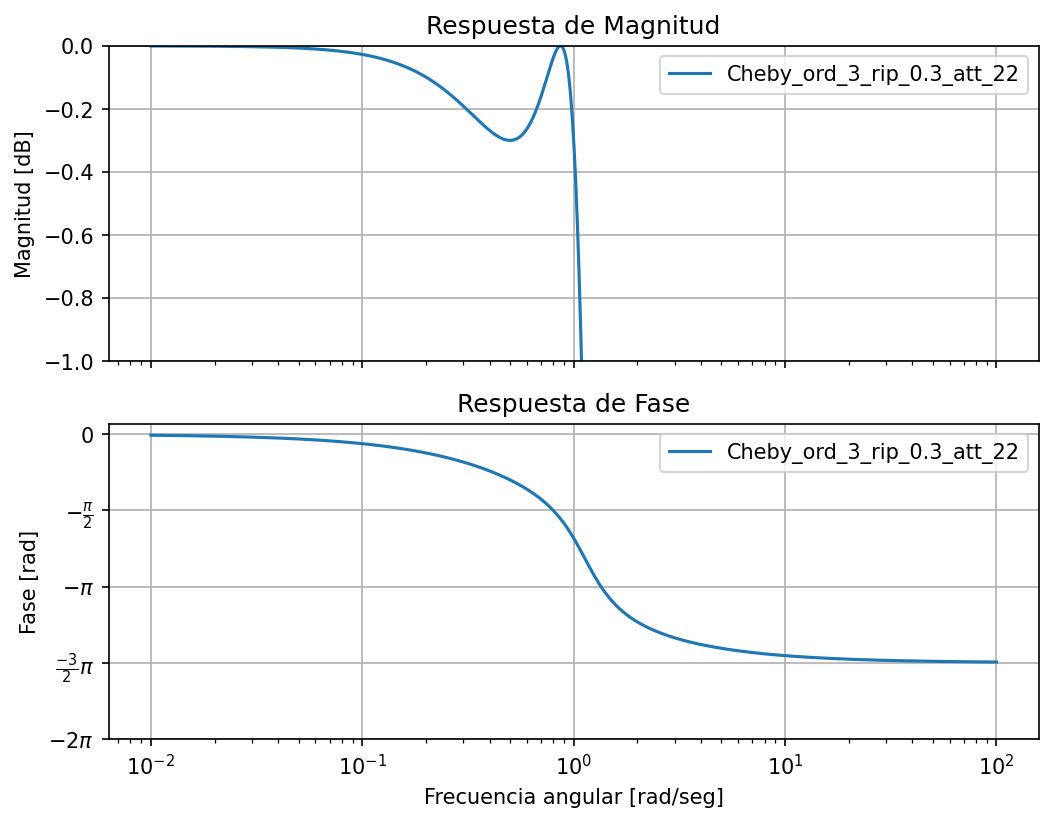

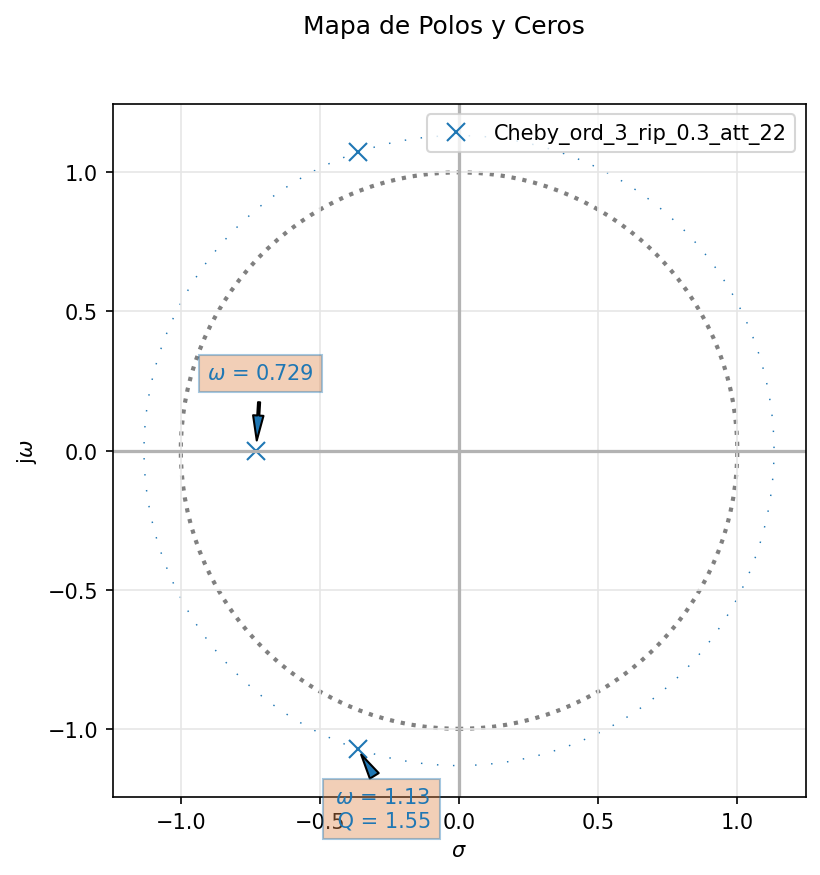

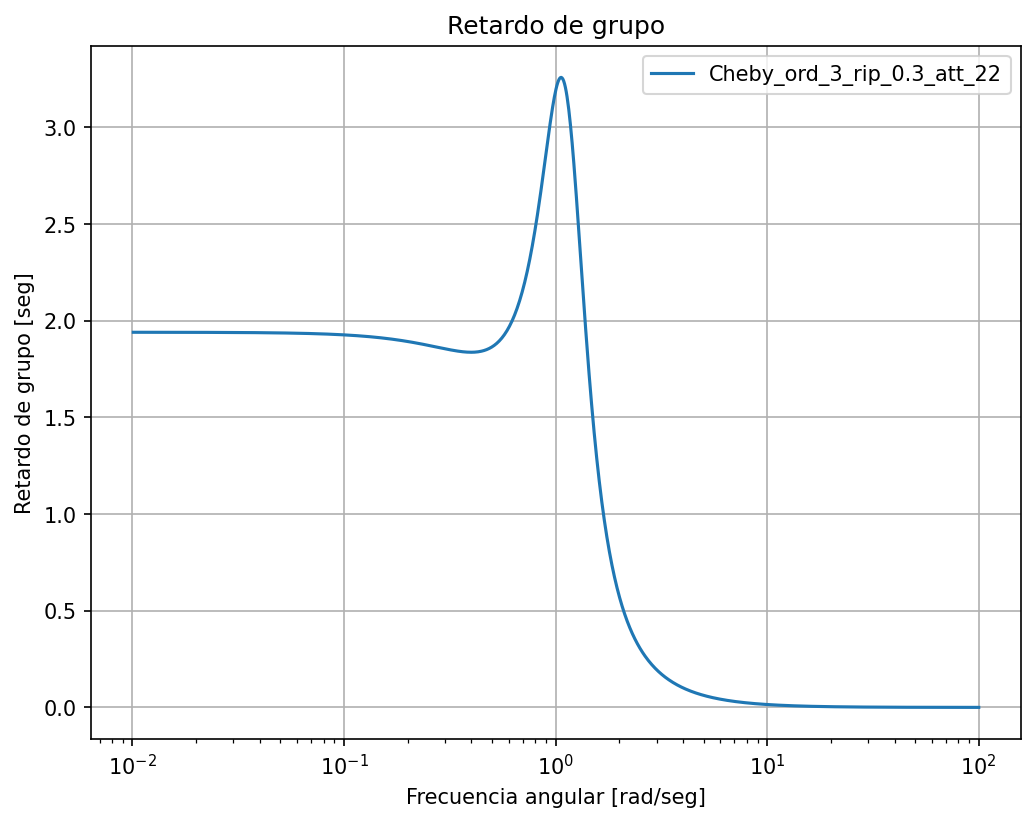

In [30]:
this_label = this_aprox + '_ord_' + str(nn) + '_rip_' + str(alfa_max) + '_att_' + str(alfa_min)

sos_cheb = tf2sos_analog(num_cheb, den_cheb)

filter_names.append(this_label)
my_tf = sig.TransferFunction(num_cheb, den_cheb)

resultados = analyze_sys(my_tf, this_label)

# Obtén el primer objeto Axes del primer elemento de la lista
primer_objeto_axes = resultados[0][1][0]

# Establece los límites del eje y en (-1, 0)
primer_objeto_axes.set_ylim(-1, 0)

print_subtitle(this_label)
# factorizamos en SOS's
pretty_print_SOS(sos_cheb, mode='omegayq')



In [9]:
sos_cheb = tf2sos_analog(num_cheb, den_cheb)

print_subtitle(this_label)
# factorizamos en SOS's
pretty_print_SOS(sos_cheb, mode='omegayq')

#### Cheby_ord_3_rip_0.3_att_22

<IPython.core.display.Math object>

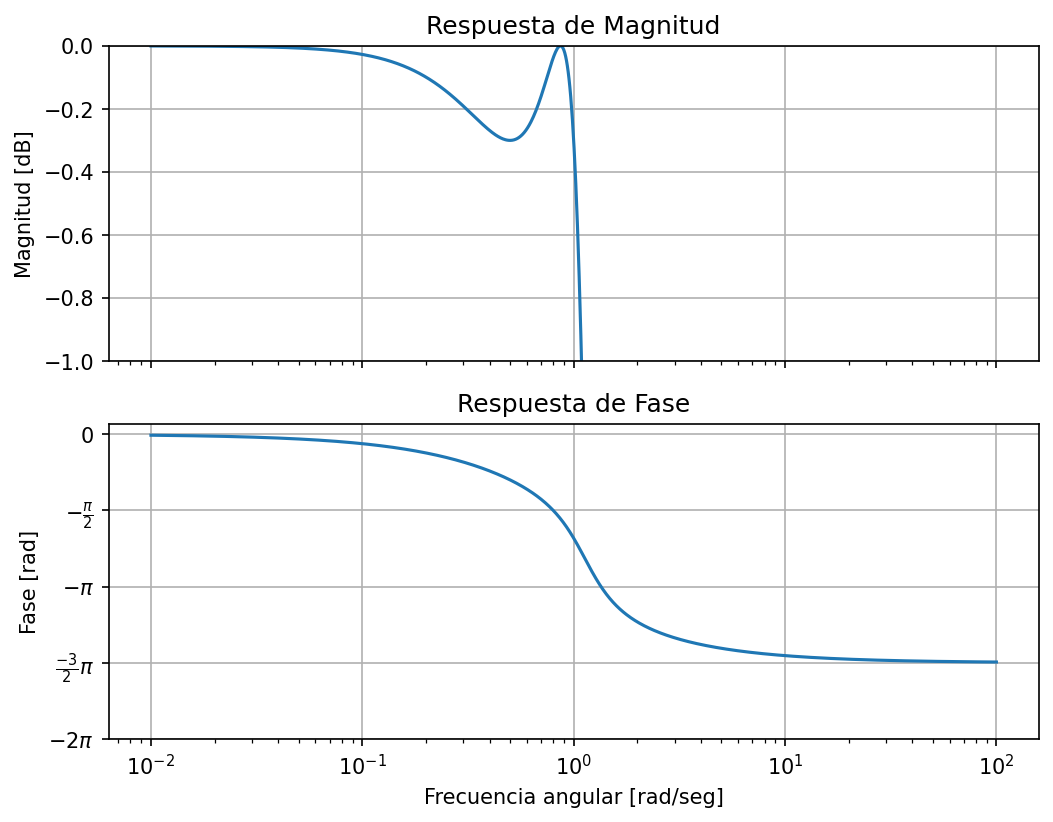

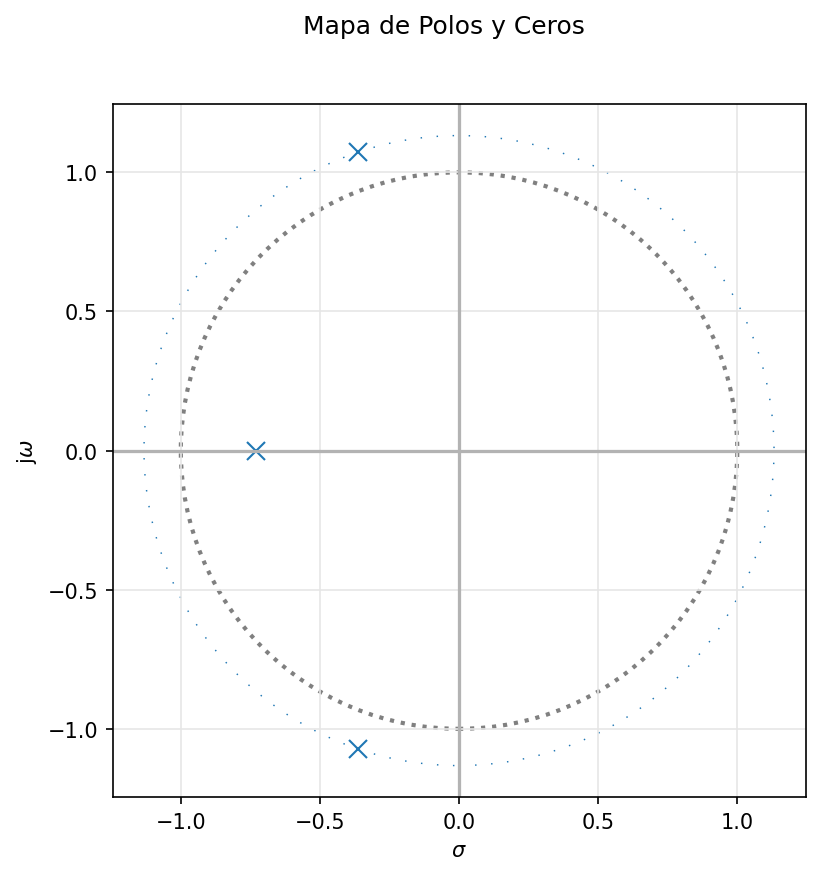

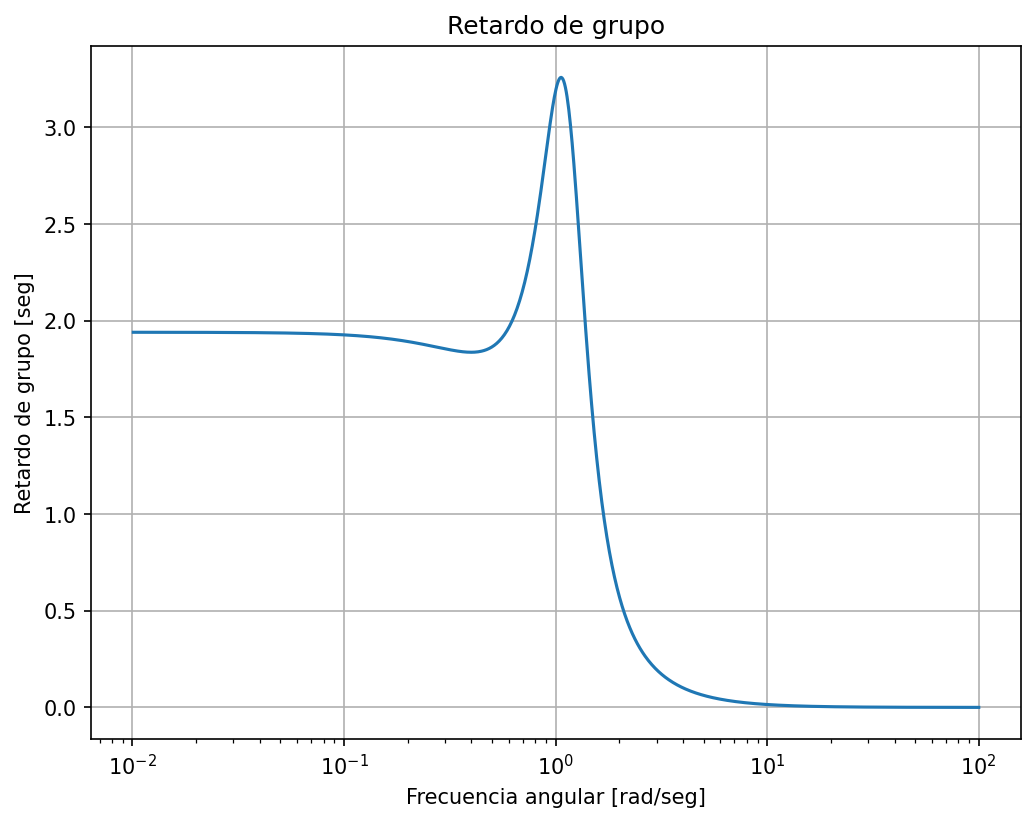

In [31]:
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot
import matplotlib.pyplot as plt

my_tf = sig.TransferFunction(num_cheb, den_cheb)

fig1, axs = bodePlot(my_tf, fig_id=1)  # Obtener la figura y las subtramas

axs[0].set_ylim(-1, 0)  # Establecer límites del eje y en la subtrama 0

pzmap(my_tf, fig_id=2)
GroupDelay(my_tf, fig_id=3)

plt.show()